# Find a place, search for imagery, and rasterize it.



[
  {
    'bbox': [-106.058364, 36.013014, -105.200117, 36.995841],
    'id': 102081181,
    'name': 'Taos',
    'path': 'continent:north-america_country:united-sta...n:new-mexico_district:northwest_county:taos',
    'placetype': 'county',
    'slug': 'north-america_united-states_new-mexico_northwest_taos'
  }
]


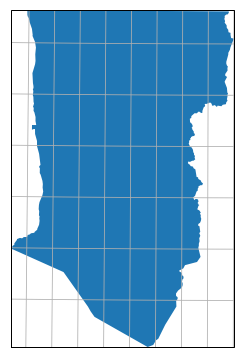

In [3]:
import os
import warnings
from pprint import pprint
#alage: import pprint
# Instead of using the `descarteslabs login` command, you can manually set the token information.
# Probably not wise to then share this notebooks with others.
os.environ['CLIENT_ID'] = 'TODO'
os.environ['CLIENT_SECRET'] = 'TODO'

import descarteslabs as dl

# Find potential matches
matches = dl.places.find('new-mexico_taos')
pprint(matches)
# The first one looks good to me, so lets make that our area of interest.
aoi = matches[0]

[{u'bbox': [-106.058364, 36.013014, -105.200117, 36.995841],
  u'id': 102081181,
  u'name': u'Taos',
  u'path': u'continent:north-america_country:united-states_region:new-mexico_district:northwest_county:taos',
  u'placetype': u'county',
  u'slug': u'north-america_united-states_new-mexico_northwest_taos'}]

# This area of interest just gives us some basic properties such as bounding boxes.
# To access a GeoJSON Geometry object of that place, we call the `Places.shape` method, in this case
# accessing a low-resolution version of this particular shape.
shape = dl.places.shape(aoi['slug'], geom='low')

# If you'd like, load up some libraries like matplotlib, shapley, and cartopy,
# and use them to plot Taos county.
#%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry
import cartopy

#alage: if get an error here in shape, uninstall and install numpy
bbox = shape['bbox']

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(4, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here
shp = shapely.geometry.shape(shape['geometry'])

# When adding a geometry in latlon coordinates, specify the latlon projection
ax.add_geometries([shp], lonlat_crs)

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()



# Searching for available imagery

In [6]:
# What imagery is available?
sources = dl.metadata.sources()
pprint(sources)

[{u'product': u'modis:09:CREFL', u'sat_id': u'Terra'},
 {u'product': u'modis:09:CREFL', u'sat_id': u'Aqua'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'LANDSAT_7'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'Landsat7'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2A'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'LANDSAT_5'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'Landsat5'},
 {u'product': u'sentinel-3:OLCI_RGB', u'sat_id': u'S3A'},
 {u'product': u'landsat:LC08:PRE:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'usda:naip:rgbn', u'sat_id': u'NAIP'},
 {u'product': u'landsat:LC08:PRE:LaSRC', u'sat_id': u'L8SR'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1A'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1B'},
 {u'product': u'srtm:GL1003', u'sat_id': u'srtm'},
 {u'product': u'landsat:LT04:PRE:TOAR', u'sat_id': u'Landsat4'},
 {u'product': u'landsat:LT04:PRE:TOAR', u'sat_id': u'LANDSAT_4'},
 {u'product': u'usda:cdl', u'sat_id': u'CDL'}]



/opt/conda/lib/python3.6/site-packages/descarteslabs/client/services/metadata/metadata.py:76: DeprecationWarning: Metadata.sources() has been deprecated and will be removed in future versions of the library. Please use Metadata.available_products() or Metadata.products() instead. 
  warn(SOURCES_DEPRECATION_MESSAGE, DeprecationWarning)


[
  {
    'product': 'modis:09:CREFL',
    'sat_id': 'Terra'
  },
  {
    'product': 'modis:09:CREFL',
    'sat_id': 'Aqua'
  },
  {
    'product': 'sentinel-2:L1C',
    'sat_id': 'S2A'
  },
  {
    'product': 'sentinel-2:L1C',
    'sat_id': 'S2B'
  },
  {
    'product': 'landsat:LE07:PRE:TOAR',
    'sat_id': 'LANDSAT_7'
  },
  {
    'product': 'landsat:LE07:PRE:TOAR',
    'sat_id': 'Landsat7'
  },
  {
    'product': 'landsat:LT05:PRE:TOAR',
    'sat_id': 'LANDSAT_5'
  },
  {
    'product': 'landsat:LT05:PRE:TOAR',
    'sat_id': 'Landsat5'
  },
  {
    'product': 'sentinel-3:OLCI_RGB',
    'sat_id': 'S3A'
  },
  {
    'product': 'landsat:LC08:PRE:TOAR',
    'sat_id': 'LANDSAT_8'
  },
  {
    'product': 'sentinel-1:GRD',
    'sat_id': 'SENTINEL-1A'
  },
  {
    'product': 'sentinel-1:GRD',
    'sat_id': 'SENTINEL-1B'
  },
  {
    'product': 'usda:naip:rgbn',
    'sat_id': 'NAIP'
  },
  {
    'product': 'usda:naip:rgbn:v1',
    'sat_id': 'NAIP'
  },
  {
    'product': 'landsat:LC08:PRE:L

[{'product': 'modis:09:CREFL', 'sat_id': 'Terra'},
 {'product': 'modis:09:CREFL', 'sat_id': 'Aqua'},
 {'product': 'landsat:LE07:PRE:TOAR', 'sat_id': 'LANDSAT_7'},
 {'product': 'landsat:LE07:PRE:TOAR', 'sat_id': 'Landsat7'},
 {'product': 'sentinel-2:L1C', 'sat_id': 'S2A'},
 {'product': 'landsat:LT05:PRE:TOAR', 'sat_id': 'LANDSAT_5'},
 {'product': 'landsat:LT05:PRE:TOAR', 'sat_id': 'Landsat5'},
 {'product': 'sentinel-3:OLCI_RGB', 'sat_id': 'S3A'},
 {'product': 'landsat:LC08:PRE:TOAR', 'sat_id': 'LANDSAT_8'},
 {'product': 'usda:naip:rgbn', 'sat_id': 'NAIP'},
 {'product': 'landsat:LC08:PRE:LaSRC', 'sat_id': 'L8SR'},
 {'product': 'sentinel-1:GRD', 'sat_id': 'SENTINEL-1A'},
 {'product': 'sentinel-1:GRD', 'sat_id': 'SENTINEL-1B'},
 {'product': 'srtm:GL1003', 'sat_id': 'srtm'},
 {'product': 'landsat:LT04:PRE:TOAR', 'sat_id': 'Landsat4'},
 {'product': 'landsat:LT04:PRE:TOAR', 'sat_id': 'LANDSAT_4'},
 {'product': 'usda:cdl', 'sat_id': 'CDL'}]

# Lets find some Landsat 8 imagery over our AOI

2
['landsat:LC08:PRE:TOAR:meta_LC80330342017072_v1', 'landsat:LC08:PRE:TOAR:meta_LC80330352017072_v1']
{'geometry': {'coordinates': [
  [
    [-105.8898318, 38.5103536],
    [-103.8445201, 38.1129959],
    [-104.3838427, 36.4246539],
    [-106.377808, 36.8201224],
    ...
  ]
],
              'type': 'Polygon'},
 'id': 'landsat:LC08:PRE:TOAR:meta_LC80330342017072_v1',
 'key': 'meta_LC80330342017072_v1',
 'properties': {'acquired': '2017-03-13T17:37:50.132812Z',
                'area': 35462.0,
                'bits_per_pixel': [1.463, 1.778, 0.922],
                'bright_fraction': 0.1168,
                'bucket': 'gs://descartes-l8/',
                'cloud_fraction': 0.1907,
                'cloud_fraction_0': 0.0643,
                'cs_code': 'EPSG:32613',
                'descartes_version': 'hedj-landsat-0.9.7.4',
                'file_md5s': ['e084f11d78cedb76968959231e598112', 'd8970e1688a8a97e09f9f4eace81edf6'],
                'file_sizes': [86541838, 46913535],
          

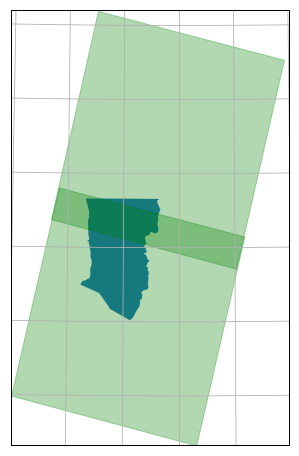

In [21]:
import json
feature_collection = dl.metadata.search(products='landsat:LC08:PRE:TOAR', start_time='2017-03-12',
                                        end_time='2017-03-20', limit=10, place=aoi['slug'])
# As the variable name implies, this returns a FeatureCollection GeoJSON dictionary.
# Its 'features' are the available scenes.
print(len(feature_collection['features']))
# The 'id' associated with each feature is a unique identifier into our imagery database.
# In this case there are two L8 scenes from adjoining WRS rows.
print([f['id'] for f in feature_collection['features']])

# Lets look at the first feature. The features are a FeatureCollection,
# so if we print it out we get a bunch of information. For example, we see that
# the overall cloud fraction is 1.2%.:
f0 = feature_collection['features'][0]
pprint(f0)

# Let's plot the footprints of the scenes:
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here

ax.add_geometries([shapely.geometry.shape(shape['geometry'])],
                   lonlat_crs)

# Get the geometry from each feature
shapes = [shapely.geometry.shape(f['geometry']) for
          f in feature_collection['features']]

ax.add_geometries(shapes, lonlat_crs, alpha=0.3, color='green')

# Get a bounding box of the combined scenes
union = shapely.geometry.MultiPolygon(polygons=shapes)
bbox = union.bounds
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)

plt.show()


# What Bands are Available?

In [25]:
band_information = dl.raster.get_bands_by_constellation("landsat:LC08:PRE:TOAR")
# or
#band_information = dl.raster.get_bands_by_key(feature_collection['features'][0]['id'])
pprint(band_information.keys())

# There is metadata associated with each band. In this case, we can tell that the "red" band
# is stored as a UInt16 dataset, has a valid range of [0, 10000] which maps to [0, 1.0] in
# Top-of-atmosphere-reflectance.
pprint(band_information['red'])


AttributeError: 'Raster' object has no attribute 'get_bands_by_constellation'

# Rasterizing imagery

In [31]:
# Collect the id's for each feature
ids = [f['id'] for f in feature_collection['features']]
# Rasterize the features.
#  * Select red, green, blue, alpha
#  * Scale the incoming data with range [0, 10000] down to [0, 4000] (40% TOAR)
#  * Choose an output type of "Byte" (uint8)
#  * Choose 60m resolution
#  * Apply a cutline of Taos county
arr, meta = dl.raster.ndarray(
    ids,
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    data_type='Byte',
    resolution=60,
    cutline=shape['geometry'],
)

# Note: A value of 1 in the alpha channel signifies where there is valid data.
# We use this throughout the majority of our imagery as a standard way of specifying
# valid or nodata regions. This is particularly helpful if a value of 0 in a particular
# band has meaning, rather than specifying a lack of data.


ImportError: Please install the numpy package

In [32]:
# We'll use matplotlib to make a quick plot of the image.
import matplotlib.pyplot as plt
%matplotlib inline


In [35]:
# We can choose other false color band combinations, like
# NIR - SWIR1 - SWIR2
arr, meta = dl.raster.ndarray(
    ids,
    bands=['nir', 'swir1', 'swir2', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    cutline=shape['geometry'],
    data_type='Byte',
    resolution=60
)
plt.figure(figsize=[16,16])
plt.imshow(arr)


ImportError: Please install the numpy package

In [36]:
# Or even derived bands like NDVI. Here the alpha channel comes in
# particularly useful as a way to select valid data. Here you may want to use
# some of the band information to scale NDVI properly.

valid_range = band_information['ndvi']['valid_range']
physical_range = band_information['ndvi']['physical_range']
print "%s maps to %s" % (valid_range, physical_range)
arr, meta = dl.raster.ndarray(
    [f['id'] for f in feature_collection['features']],
    bands=['ndvi', 'alpha'],
    scales=[[valid_range[0], valid_range[1], physical_range[0], physical_range[1]], None],
    cutline=shape['geometry'],
    data_type='Float32',
    resolution=60
)


SyntaxError: invalid syntax (<ipython-input-36-a8f59cefe4a6>, line 7)

In [37]:
[0, 65535] maps to [-1.0, 1.0]


SyntaxError: invalid syntax (<ipython-input-37-7769e90fd74a>, line 1)

In [38]:
# Here we can make a numpy masked array using alpha == 0 as a nodata mask.
import numpy as np
mask = arr[:, :, 1] == 0
masked_ndvi = np.ma.masked_array(arr[:, :, 0], mask)
plt.figure(figsize=[16,16])
plt.imshow(masked_ndvi, cmap='BrBG', vmin=0, vmax=0.5)
cb = plt.colorbar()
cb.set_label("NDVI")


NameError: name 'arr' is not defined